![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


import pandas.testing as tm
%matplotlib inline

In [85]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [86]:
df.dropna(inplace=True) # Preprocesamiento: eliminamos filas con datos faltante


<ipython-input-87-11e285bfd400>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health',data=df,palette='RdBu_r')


<Axes: xlabel='fetal_health', ylabel='count'>

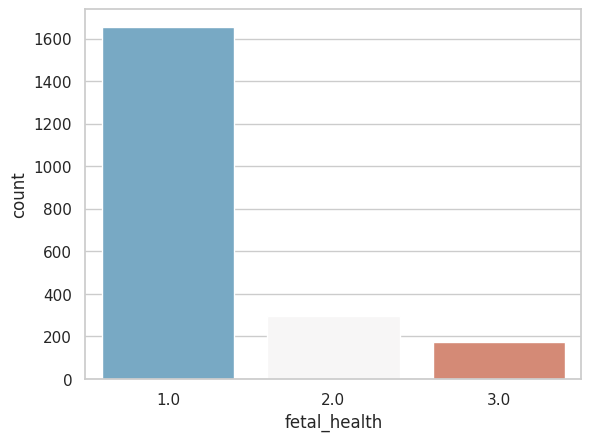

In [87]:
#Se procede a realizar el conteo de los targets a fin de determinar a cual le haremos un ML con SVM
sns.set_style('whitegrid')
sns.countplot(x='fetal_health',data=df,palette='RdBu_r')
#Se visualiza que tiene una distribucion dispar entre sus clases, por lo que tomaremos en cuenta el valor de F1.

In [88]:
#Estandarizamos los datos :
df1=df.drop(columns=['fetal_health'])
df1_numeric= df1.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df1_normalized = scaler.fit_transform(df1_numeric)

df1_new = pd.DataFrame(df1_normalized, columns=df1_numeric.columns)



# Combinar los datos normalizados con las columnas no numéricas
df2= pd.concat([df1_new, df1.select_dtypes(exclude=['float64', 'int64'])], axis=1)
df2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.000000,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.000000,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.000000,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725,...,0.209040,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5
2122,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0
2123,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780,...,0.361582,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0
2124,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0


In [89]:
#Luego de normalizar, seleccionamos las caracteristicas más trascendentales para nuestra data.
df3=df["fetal_health"]
# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier()
clf.fit(df2, df3)

# Obtener los nombres de las características
nombres_caracteristicas = df2.columns

# Seleccionar características basadas en la importancia del clasificador
selector = SelectFromModel(clf, prefit=True, threshold=None)
selector.fit(df2, df3)

# Obtener las características seleccionadas
caracteristicas_seleccionadas = nombres_caracteristicas[selector.get_support()]


df4=df2[caracteristicas_seleccionadas] # Obtenemos las caracteristicas mas trascendentales para realizar la clasificación
df4


,accelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median
0,0.000000,0.813333,0.044118,0.472527,0.472441,0.587156,0.403670
1,0.315789,0.066667,0.279412,0.000000,0.637795,0.577982,0.577982
2,0.157895,0.053333,0.279412,0.000000,0.637795,0.568807,0.559633
3,0.157895,0.053333,0.323529,0.000000,0.606299,0.559633,0.550459
4,0.368421,0.053333,0.323529,0.000000,0.606299,0.577982,0.559633
...,...,...,...,...,...,...,...
2121,0.000000,0.893333,0.000000,0.274725,0.732283,0.706422,0.688073
2122,0.052632,0.880000,0.029412,0.241758,0.724409,0.688073,0.678899
2123,0.052632,0.893333,0.029412,0.219780,0.732283,0.688073,0.688073
2124,0.052632,0.880000,0.029412,0.296703,0.724409,0.678899,0.678899


<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


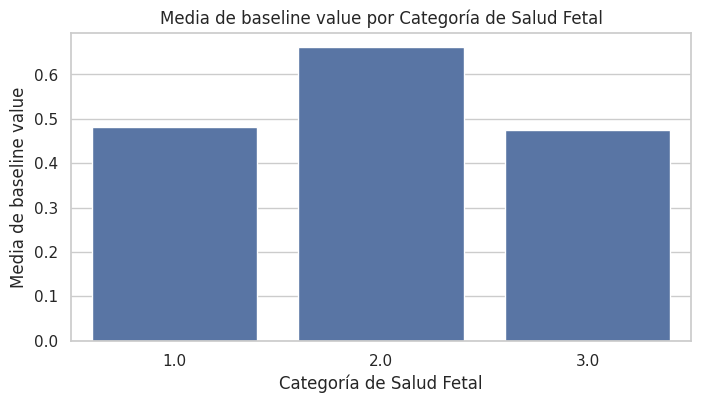

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


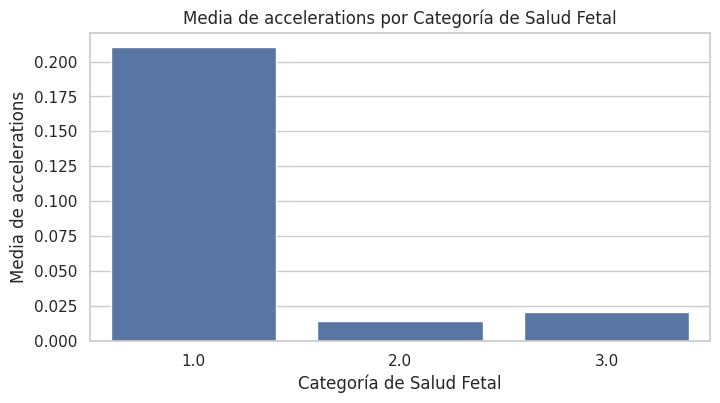

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


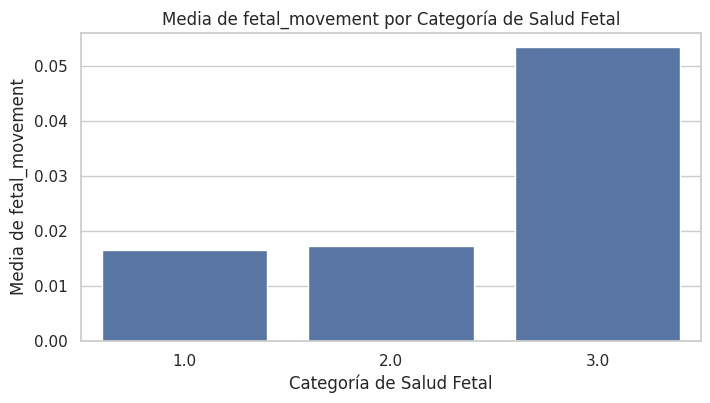

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


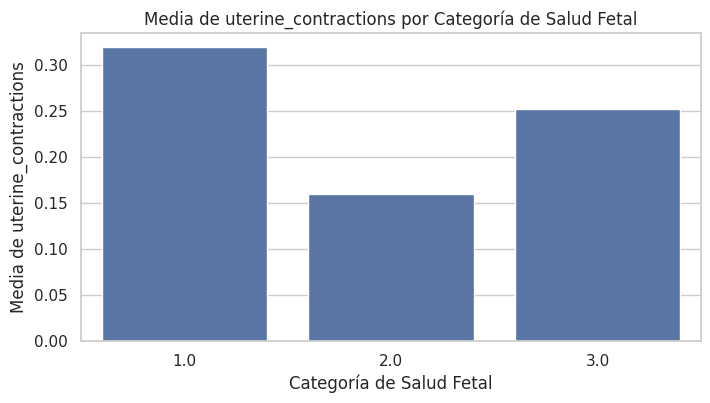

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


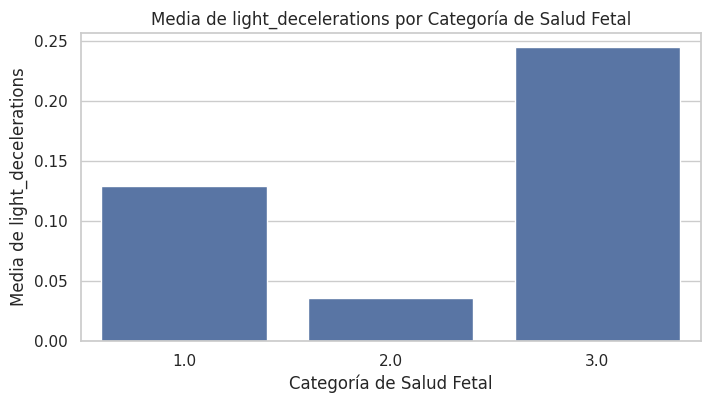

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


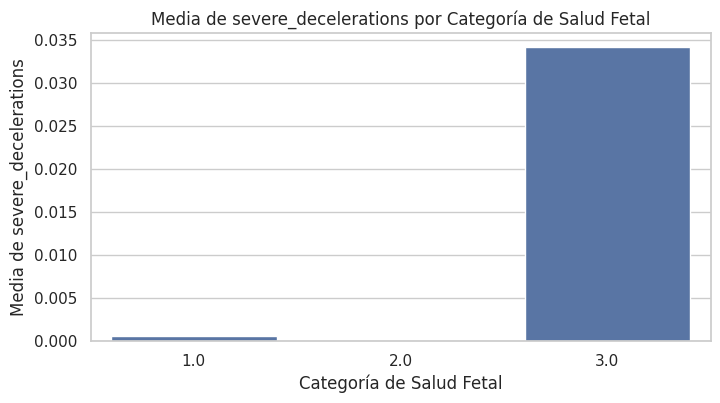

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


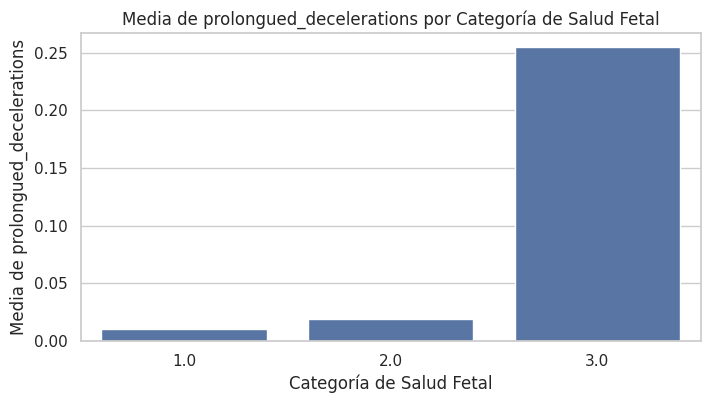

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


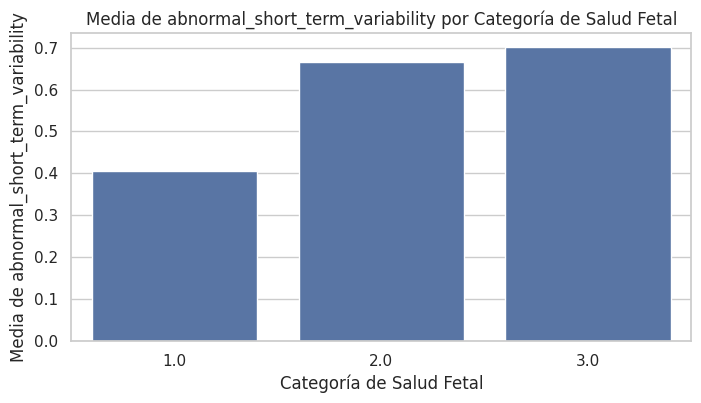

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


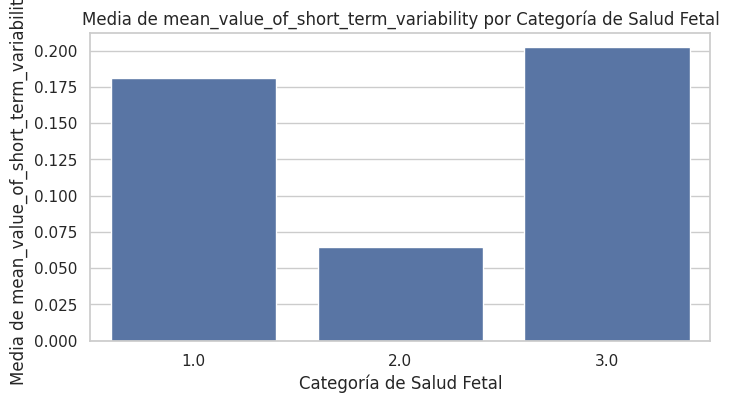

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


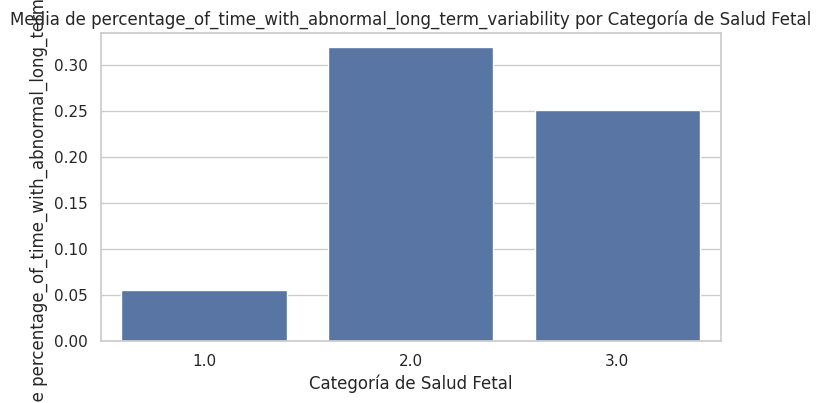

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


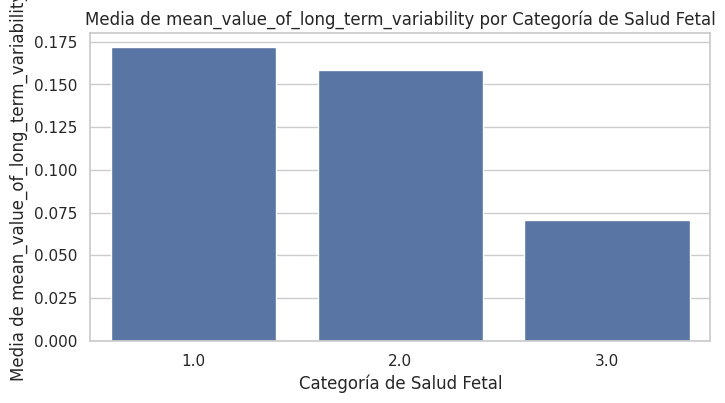

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


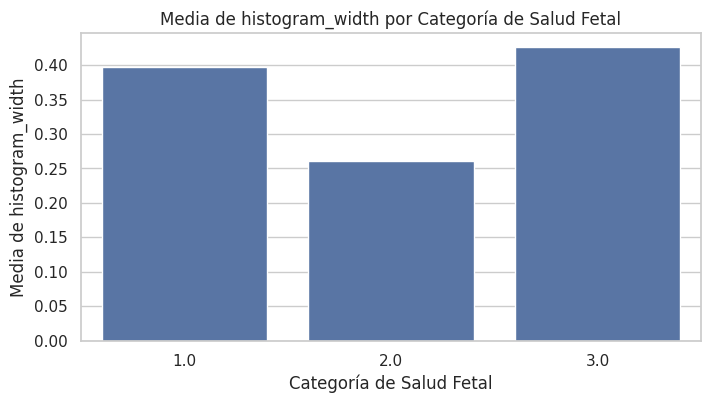

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


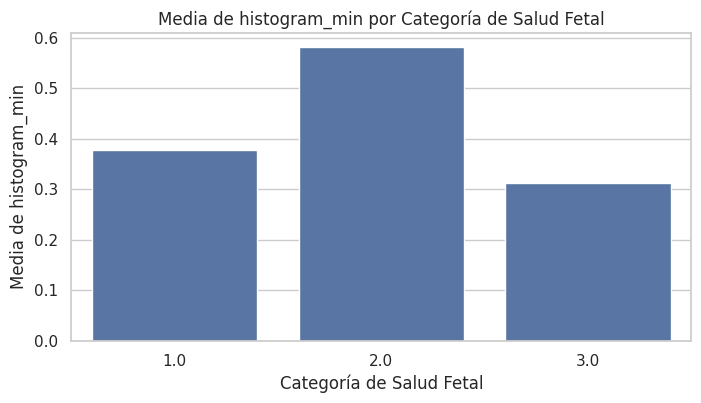

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


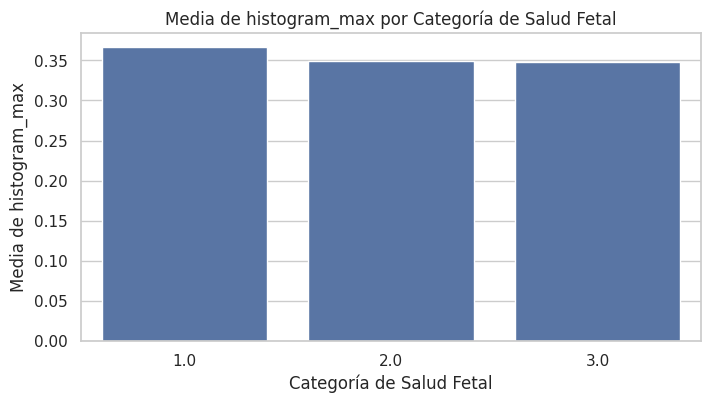

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


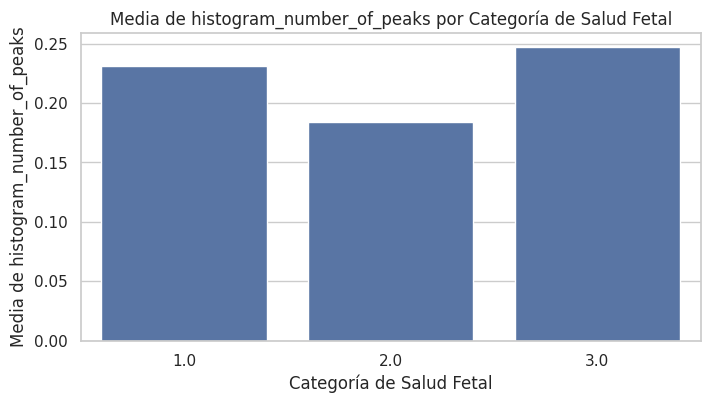

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


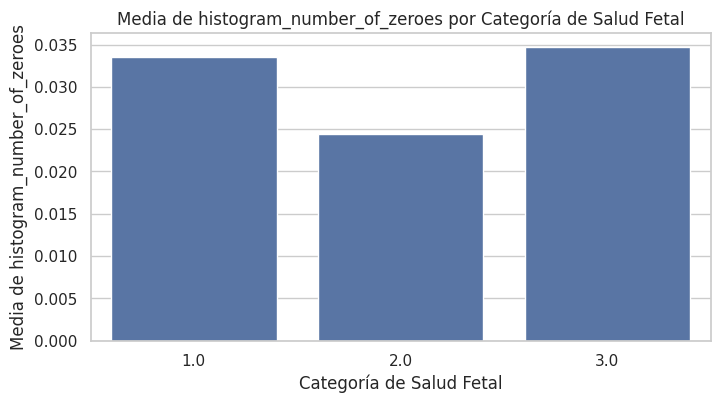

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


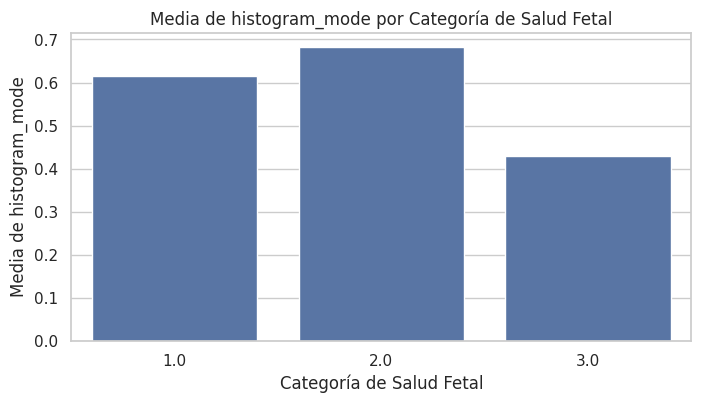

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


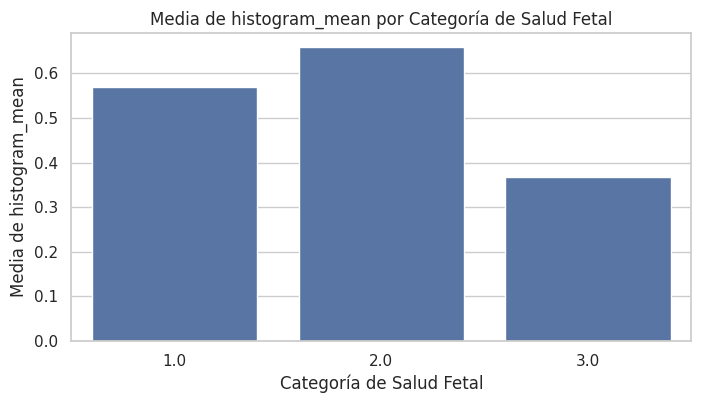

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


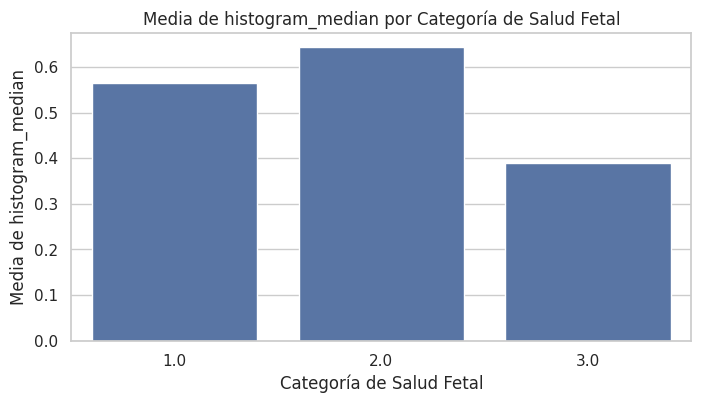

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


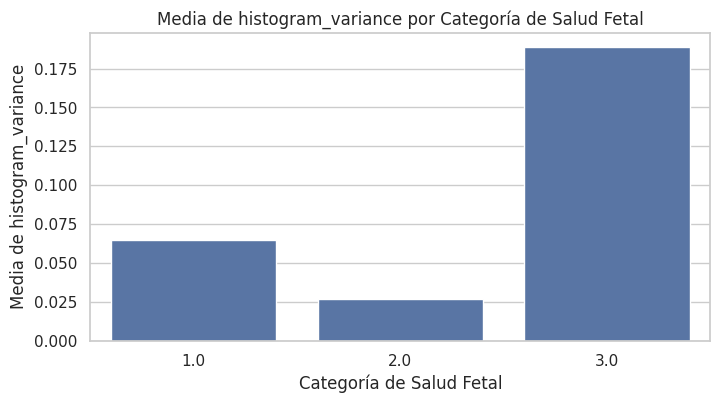

<ipython-input-90-26d1cd561c3e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df3, y=feature, data=df2, ci=None)


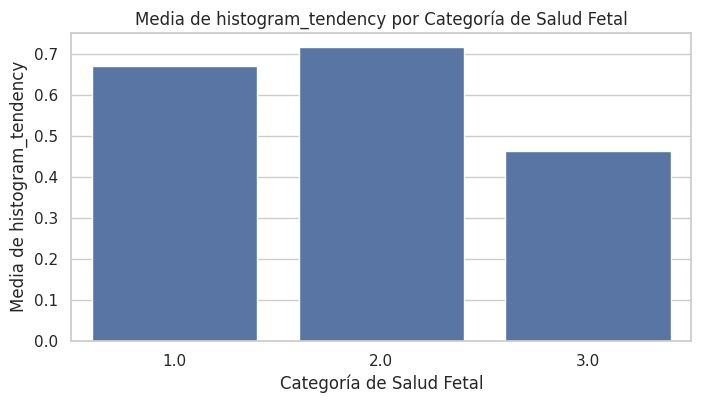

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'fetal_health' es tu columna objetivo
feature_columns = df2  # Excluimos la columna objetivo

# Establecer el estilo del gráfico
sns.set(style="whitegrid")

# Para cada característica, hacemos un gráfico de barras
for feature in feature_columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df3, y=feature, data=df2, ci=None)
    plt.title(f'Media de {feature} por Categoría de Salud Fetal')
    plt.xlabel('Categoría de Salud Fetal')
    plt.ylabel(f'Media de {feature}')
    plt.show()

In [94]:
#Inspeccion visual : eliminamos algunas caracteristicas que no tiene una distribucion adecuada. %aceleration , ligtrh deceleration , severe_deceleration, prolongued_deceleration , histogram variance.
#df1=df.drop(columns=['fetal_health'])
#df4=df2.drop(columns=['accelerations','light_decelerations','severe_decelerations','prolongued_decelerations','histogram_variance'])
#df4 $ PERo no mostro una mejor validacion cruzada que el seleccionador de caracteristica por Random Forest .



Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       333
         2.0       0.83      0.70      0.76        64
         3.0       0.88      0.79      0.84        29

    accuracy                           0.92       426
   macro avg       0.89      0.82      0.85       426
weighted avg       0.92      0.92      0.92       426

Matriz de confusión:
 [[325   6   2]
 [ 18  45   1]
 [  3   3  23]]
Exactitud del modelo: 0.9225352112676056
Puntuaciones de validación cruzada: [0.87793427 0.88262911 0.90610329 0.87793427 0.88732394 0.88732394
 0.85377358 0.88679245 0.86320755 0.58490566]
Promedio de puntuaciones de validación cruzada: 0.8507928071574099


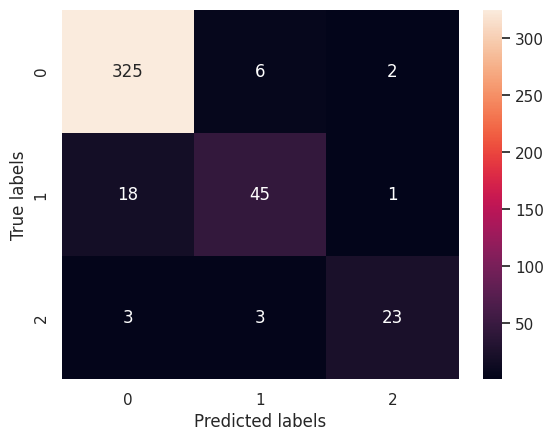

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


X_scaled=df4
y=df3
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo k-vecinos
k = 5  # o cualquier otro valor que se desee probar
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

# Validación cruzada
cv_scores = cross_val_score(knn, X_scaled, y, cv=10)
print("Puntuaciones de validación cruzada:", cv_scores)
print("Promedio de puntuaciones de validación cruzada:", cv_scores.mean())

# Gráfico de la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



Reporte de clasificación (Árbol de Decisión):
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.75      0.69      0.72        64
         3.0       0.88      0.97      0.92        29

    accuracy                           0.91       426
   macro avg       0.85      0.87      0.86       426
weighted avg       0.91      0.91      0.91       426

Matriz de confusión (Árbol de Decisión):
 [[316  15   2]
 [ 18  44   2]
 [  1   0  28]]
Exactitud del modelo de Árbol de Decisión: 0.9107981220657277
Puntuaciones de validación cruzada (Árbol de Decisión): [0.83098592 0.8685446  0.87323944 0.82629108 0.91549296 0.89201878
 0.8490566  0.8254717  0.83962264 0.51886792]
Promedio de puntuaciones de validación cruzada (Árbol de Decisión): 0.8239591637877581


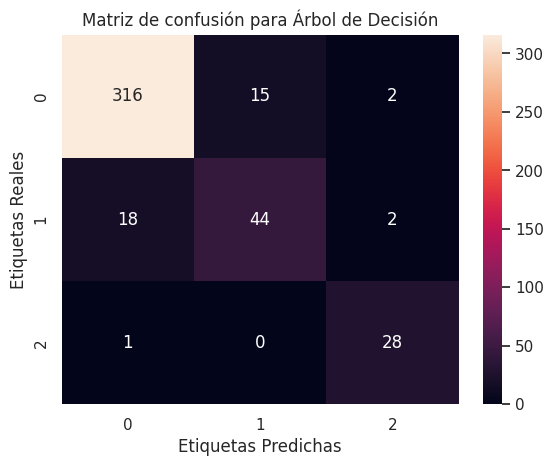

In [93]:
#Quiero analizar otro modelo - DECISION TREE.
from sklearn.tree import DecisionTreeClassifier



X_scaled=df4
y=df3

# Crear y entrenar el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = decision_tree.predict(X_test)

# Evaluación del modelo de árbol de decisión
print("Reporte de clasificación (Árbol de Decisión):\n", classification_report(y_test, y_pred_tree))
print("Matriz de confusión (Árbol de Decisión):\n", confusion_matrix(y_test, y_pred_tree))
print("Exactitud del modelo de Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))

# Validación cruzada para el árbol de decisión
cv_scores_tree = cross_val_score(decision_tree, X_scaled, y, cv=10)
print("Puntuaciones de validación cruzada (Árbol de Decisión):", cv_scores_tree)
print("Promedio de puntuaciones de validación cruzada (Árbol de Decisión):", cv_scores_tree.mean())

# Gráfico de la matriz de confusión para el árbol de decisión
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='g')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de confusión para Árbol de Decisión')
plt.show()